# Mortgage Worth
This notbeook will explore different housing options

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def calculate_monthly_payment(loanAmount, interestRate, loanTermYears):
    monthlyInterest = interestRate/12
    numberOfPayments = loanTermYears*12
    return loanAmount*(monthlyInterest*(1+monthlyInterest)**numberOfPayments)/((1+monthlyInterest)**numberOfPayments-1)

def amortization(loanAmount, interestRate, loanTermYears, loanBalance):
    totalMonthlyPayment = calculate_monthly_payment(loanAmount, interestRate, loanTermYears)
    principal = totalMonthlyPayment-(loanBalance*interestRate/12)
    interest = totalMonthlyPayment - principal
    return interest, principal


In [11]:
class Situation:
    def __init__(self, homePrice, interestRate, loanTerm, extraPayment, name):
        self.homePrice = homePrice
        self.intereRate = interestRate
        self.loanTerm = loanTerm
        self.extraPayment = extraPayment
        self.monthlyPayment = 0
        self.name = name
        self.payoffMonth = 0
        self.principal = []
        self.interest = []
        self.total = []

In [12]:
def calculate_situation(homePrice, interestRate, loanTerm, extraPayment, name):
    principalTotal = 0 + extraPayment
    interestTotal = 0
    situation = Situation(homePrice, interestRate, loanTerm, extraPayment, name)
    situation.monthlyPayment = calculate_monthly_payment(homePrice, interestRate, loanTerm)
    for i in range(loanTerm*12):
        if principalTotal <= homePrice:
            it, pt = amortization(homePrice, interestRate, loanTerm, homePrice-principalTotal)
            pt += extraPayment
            situation.payoffMonth = i
        else:
            pt = 0
            it = 0
        principalTotal += pt
        interestTotal += it
        situation.principal.append(principalTotal)
        situation.interest.append(interestTotal)
        situation.total.append(principalTotal+interestTotal)
    return situation

def calculate_situation_leapfrog(homePrice1, homePrice2, leapYear, interestRate, loanTerm, extraPayment, name):
    principalTotal = 0 + extraPayment
    interestTotal = 0
    situation = Situation(homePrice1, interestRate, loanTerm, extraPayment, name)
    situation.monthlyPayment = calculate_monthly_payment(homePrice1, interestRate, loanTerm)
    for i in range(loanTerm*12):
        if principalTotal <= homePrice1:
            it, pt = amortization(homePrice1, interestRate, loanTerm, homePrice1-principalTotal)
            pt += extraPayment
            situation.payoffMonth = i
        elif ((principalTotal) <= homePrice2) and (i/12>=leapYear):
            it, pt = amortization(homePrice2-principalTotal, interestRate, loanTerm, homePrice2-principalTotal)
            pt += extraPayment
            situation.payoffMonth = i
        else:
            pt = 0
            it = 0
        principalTotal += pt
        interestTotal += it
        situation.principal.append(principalTotal)
        situation.interest.append(interestTotal)
        situation.total.append(principalTotal+interestTotal)
    return situation    

In [13]:
def plot_situation(situation):
    x = np.arange(0, situation.loanTerm, 1/12)
    plt.plot(x, situation.principal)
    plt.plot(x, situation.interest)
    plt.plot(x, situation.total)
    plt.grid()
    plt.show()

def plot_situation_compare(situationList, field):
    legend = []
    for situation in situationList:
        x = np.arange(0, situation.loanTerm, 1/12)
        plt.plot(x, situation.total)
        legend.append(situation.name)
    plt.legend(legend)
    plt.grid()
    plt.show()

def plot_situation_payoff_compare(situationList):
    legend = []
    for situation in situationList:
        plt.scatter(situation.payoffMonth//12, situation.interest[situation.payoffMonth])
        legend.append("{} - ({},{})".format(situation.name, 
                                            round(situation.payoffMonth/12), 
                                            round(situation.interest[situation.payoffMonth])))
    plt.legend(legend)
    plt.grid()
    plt.show()

In [14]:
situation_1 = calculate_situation(200000, 0.05, 30, 0, "200k - No Extra")
situation_2 = calculate_situation(300000, 0.05, 30, 0, "300k - No Extra")
situation_3 = calculate_situation(400000, 0.07, 30, 1000, "400k - 1k Extra")
situation_4 = calculate_situation(500000, 0.07, 30, 0, "500k - No Extra")
situation_5 = calculate_situation(200000, 0.05, 30, 2000, "200k - 2k Extra")
situation_6 = calculate_situation(300000, 0.05, 30, 2000, "300k - 2k Extra")
situation_7 = calculate_situation(300000, 0.05, 30, 2700, "300k - 2k Extra & Roommate")
situation_8 = calculate_situation_leapfrog(200000, 400000, 0, 0.05, 30, 2000, "200k Leapfrog 400k - 2k Extra")
situation_9 = calculate_situation_leapfrog(300000, 600000, 15, 0.05, 30, 2000, "300k Leapfrog 600k - 2k Extra")
# situationList = [situation_1, situation_2, situation_3, situation_4, situation_5, situation_6, situation_7, situation_8, situation_9]
situationList = [situation_3, situation_5, situation_6, situation_8, situation_9]
for situation in situationList:
    print("{} : Monthly Payment=${}".format(situation.name, round(situation.monthlyPayment)))

400k - 1k Extra : Monthly Payment=$2661
200k - 2k Extra : Monthly Payment=$1074
300k - 2k Extra : Monthly Payment=$1610
200k Leapfrog 400k - 2k Extra : Monthly Payment=$1074
300k Leapfrog 600k - 2k Extra : Monthly Payment=$1610


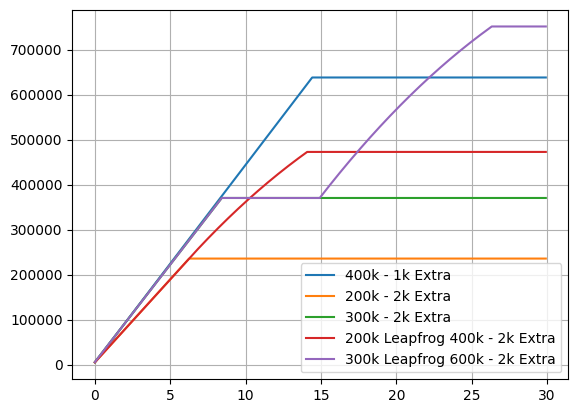

In [15]:
plot_situation_compare(situationList, "na")

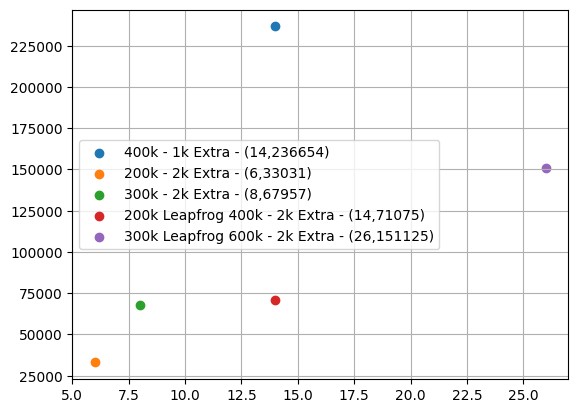

In [16]:
plot_situation_payoff_compare(situationList)